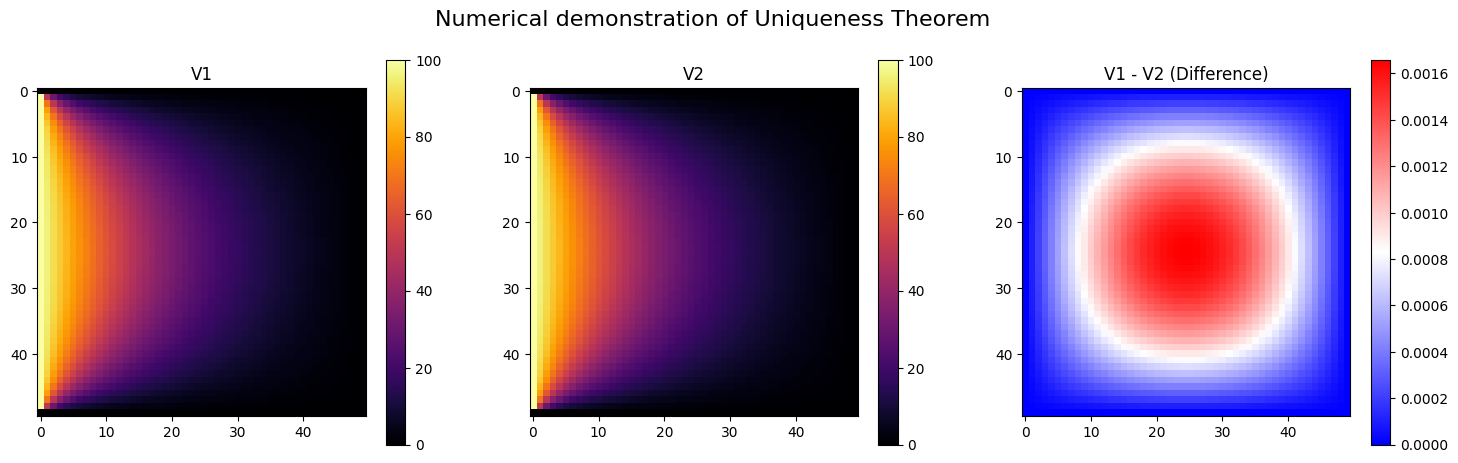

Max difference between solutions: 0.001659911450524021


In [1]:
import numpy as np
import matplotlib.pyplot as plt


nx, ny = 50, 50
V1 = np.zeros((nx, ny))
V2 = np.zeros((nx, ny))
V_diff = np.zeros((nx, ny))
tolerance = 1e-5
iterations = 5000

V1[:, 0] = 100
V2[:, 0] = 100

V1[:, -1] = 0
V2[:, -1] = 0

V1[0, :] = 0
V2[0, :] = 0

V1[-1, :] = 0
V2[-1, :] = 0


V1[1:-1, 1:-1] = 50
V2[1:-1, 1:-1] = 20


for it in range(iterations):
    V1[1:-1, 1:-1] = 0.25 * (V1[1:-1, :-2] + V1[1:-1, 2:] +
                              V1[:-2, 1:-1] + V1[2:, 1:-1])
    V2[1:-1, 1:-1] = 0.25 * (V2[1:-1, :-2] + V2[1:-1, 2:] +
                              V2[:-2, 1:-1] + V2[2:, 1:-1])

    if np.max(np.abs(V1 - V2)) < tolerance:
        break


V_diff = V1 - V2

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

im1 = ax[0].imshow(V1, cmap='inferno')
ax[0].set_title('V1')
fig.colorbar(im1, ax=ax[0])

im2 = ax[1].imshow(V2, cmap='inferno')
ax[1].set_title('V2')
fig.colorbar(im2, ax=ax[1])

im3 = ax[2].imshow(V_diff, cmap='bwr')
ax[2].set_title('V1 - V2 (Difference)')
fig.colorbar(im3, ax=ax[2])

plt.suptitle("Numerical demonstration of Uniqueness Theorem", fontsize=16)
plt.show()

print("Max difference between solutions:", np.max(np.abs(V_diff)))
